In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
max_scores = {"Cell Cycle Transcription by Coupled CDK and Network Oscillators": 90,
              "Metabolic Interactions in the Gut Microbiome": 120,
              "Mammalian Cell Cycle 2006": 100,
              "T-LGL Survival Network 2011 Reduced Network": 180,
              "IL-1 Signaling": 1180,
              "Glucose Repression Signaling 2009": 730,
              "Signaling in Macrophage Activation": 3200,
              "Influenza A Virus Replication Cycle": 1310,
              "ABA_GA_BASE_A": 505}

In [3]:
df_raw = pd.read_csv("population log.csv")
df_raw["max"] = df_raw["sample_model"].apply(lambda x: max_scores[x])

df_raw.head()

,sample_model,iter,pop,keep,mix,prob,0,1,2,3,...,92,93,94,95,96,97,98,99,100,max
0,Cell Cycle Transcription by Coupled CDK and Ne...,1,101,1,0,0.2,61.8750,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.5,90
1,Cell Cycle Transcription by Coupled CDK and Ne...,1,101,1,0,0.2,31.3125,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,90
2,Cell Cycle Transcription by Coupled CDK and Ne...,1,101,1,0,0.2,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.5,90
3,Cell Cycle Transcription by Coupled CDK and Ne...,1,101,1,0,0.2,26.6875,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,90
4,Cell Cycle Transcription by Coupled CDK and Ne...,1,101,1,0,0.2,41.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,90


In [4]:
df_per = df_raw.groupby(["sample_model", "iter"]).mean().reset_index()
df_per.iloc[:,6:] = df_per.iloc[:,6:].div(df_per["max"], axis=0)

df_per.head()

,sample_model,iter,pop,keep,mix,prob,0,1,2,3,...,92,93,94,95,96,97,98,99,100,max
0,ABA_GA_BASE_A,1,101.0,1.0,0.0,0.01,0.617254,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.647594,1.0
1,ABA_GA_BASE_A,2,51.0,1.0,0.0,0.01,0.617254,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.661732,1.0
2,ABA_GA_BASE_A,5,21.0,1.0,0.0,0.01,0.617254,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.668182,1.0
3,ABA_GA_BASE_A,10,11.0,1.0,0.0,0.01,0.617254,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.677562,1.0
4,ABA_GA_BASE_A,20,6.0,1.0,0.0,0.01,0.617254,NaN,NaN,NaN,...,NaN,NaN,NaN,0.671508,NaN,NaN,NaN,NaN,0.672983,1.0


In [5]:
sample_models = ["Cell Cycle Transcription by Coupled CDK and Network Oscillators",
                 "Metabolic Interactions in the Gut Microbiome",
                 "Mammalian Cell Cycle 2006",
                 "T-LGL Survival Network 2011 Reduced Network",
                 "IL-1 Signaling",
                 "Glucose Repression Signaling 2009",
                 "Signaling in Macrophage Activation",
                 "Influenza A Virus Replication Cycle"]

samples = df_per.loc[df_per["sample_model"].isin(sample_models)]
aba = df_per.loc[df_per["sample_model"] == "ABA_GA_BASE_A"]

In [6]:
samples_iter = samples.drop(columns="sample_model").groupby("iter").mean().reset_index()
samples_iter.interpolate(axis=1, inplace=True)
samples_iter

,iter,pop,keep,mix,prob,0,1,2,3,4,...,92,93,94,95,96,97,98,99,100,max
0,1.0,101.0,1.0,0.0,0.2,0.430364,0.433729,0.437094,0.440459,0.443824,...,0.739927,0.743292,0.746657,0.750022,0.753386,0.756751,0.760116,0.763481,0.766846,1.0
1,2.0,51.0,1.0,0.0,0.2,0.430364,0.436319,0.442274,0.448229,0.454184,...,0.794523,0.796105,0.797686,0.799267,0.800848,0.802429,0.804010,0.805591,0.807173,1.0
2,5.0,21.0,1.0,0.0,0.2,0.430364,0.442860,0.455356,0.467852,0.480348,...,0.819904,0.820616,0.821327,0.822039,0.822750,0.823462,0.824174,0.824885,0.825597,1.0
3,10.0,11.0,1.0,0.0,0.2,0.430364,0.450803,0.471242,0.491681,0.512120,...,0.838295,0.838867,0.839439,0.840011,0.840583,0.841155,0.841727,0.842299,0.842871,1.0
4,20.0,6.0,1.0,0.0,0.2,0.430364,0.462003,0.493642,0.525281,0.556920,...,0.846432,0.847148,0.847864,0.848580,0.849284,0.849988,0.850692,0.851396,0.852100,1.0
5,50.0,3.0,1.0,0.0,0.2,0.430364,0.484921,0.539477,0.563471,0.587465,...,0.839995,0.840651,0.841306,0.841907,0.842507,0.843014,0.843520,0.844192,0.844864,1.0
6,100.0,2.0,1.0,0.0,0.2,0.430364,0.480655,0.529521,0.557820,0.590042,...,0.847276,0.847651,0.848355,0.848822,0.849618,0.851063,0.851617,0.851773,0.852347,1.0


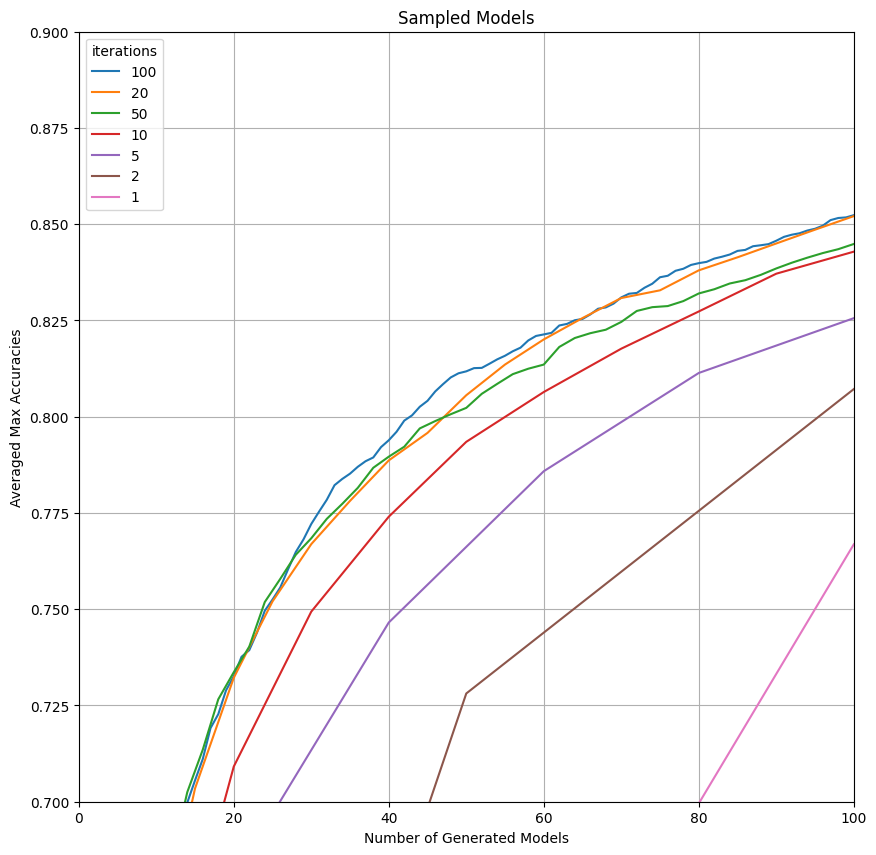

In [20]:
fig, ax1= plt.subplots(1,figsize=(10,10))
# set up
ax1.plot(range(101), samples_iter.iloc[6,5:106], label="100", color = "C0")
ax1.plot(range(101), samples_iter.iloc[4,5:106], label="20", color = "C1")
ax1.plot(range(101), samples_iter.iloc[5,5:106], label="50", color = "C2")
ax1.plot(range(101), samples_iter.iloc[3,5:106], label="10", color = "C3")
ax1.plot(range(101), samples_iter.iloc[2,5:106], label="5", color = "C4")
ax1.plot(range(101), samples_iter.iloc[1,5:106], label="2", color = "C5")
ax1.plot(range(101), samples_iter.iloc[0,5:106], label="1", color = "C6")

ax1.legend(title="iterations", loc="upper left")
ax1.grid()
ax1.set_xlim(00, 100)
ax1.set_ylim(0.7, 0.9)
ax1.set_xlabel("Number of Generated Models")
ax1.set_ylabel("Averaged Max Accuracies")
ax1.set_title("Sampled Models")

plt.show()

In [8]:
aba_iter = aba.drop(columns="sample_model").groupby("iter").mean().reset_index()
aba_iter.interpolate(axis=1, inplace=True)
aba_iter

,iter,pop,keep,mix,prob,0,1,2,3,4,...,92,93,94,95,96,97,98,99,100,max
0,1.0,101.0,1.0,0.0,0.01,0.617254,0.617557,0.617861,0.618164,0.618467,...,0.645167,0.645470,0.645774,0.646077,0.646381,0.646684,0.646987,0.647291,0.647594,1.0
1,2.0,51.0,1.0,0.0,0.01,0.617254,0.617681,0.618109,0.618537,0.618964,...,0.658036,0.658498,0.658960,0.659422,0.659884,0.660346,0.660808,0.661270,0.661732,1.0
2,5.0,21.0,1.0,0.0,0.01,0.617254,0.617980,0.618706,0.619432,0.620158,...,0.664941,0.665346,0.665751,0.666157,0.666562,0.666967,0.667372,0.667777,0.668182,1.0
3,10.0,11.0,1.0,0.0,0.01,0.617254,0.618022,0.618790,0.619559,0.620327,...,0.673650,0.674139,0.674628,0.675117,0.675606,0.676095,0.676584,0.677073,0.677562,1.0
4,20.0,6.0,1.0,0.0,0.01,0.617254,0.617760,0.618266,0.618772,0.619278,...,0.670380,0.670756,0.671132,0.671508,0.671803,0.672098,0.672393,0.672688,0.672983,1.0
5,50.0,3.0,1.0,0.0,0.01,0.617254,0.618616,0.619978,0.621161,0.622344,...,0.682930,0.683047,0.683164,0.683999,0.684835,0.685150,0.685466,0.685932,0.686397,1.0
6,100.0,2.0,1.0,0.0,0.01,0.617254,0.619176,0.619882,0.620114,0.620185,...,0.677033,0.677649,0.678407,0.678624,0.678972,0.679457,0.679605,0.679675,0.679726,1.0


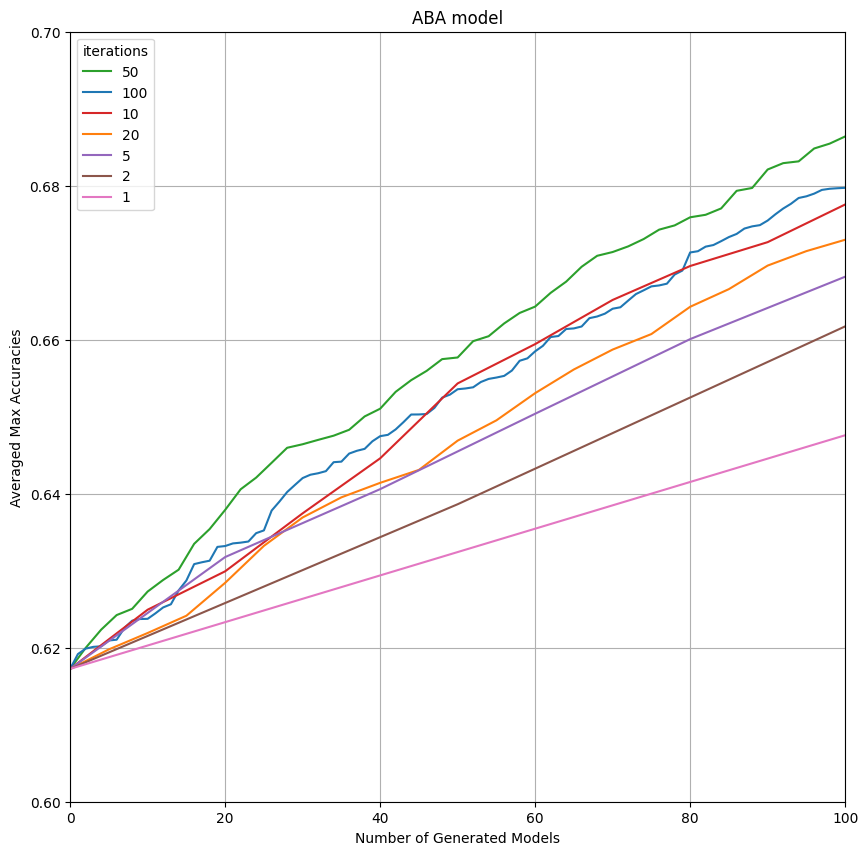

In [21]:
fig, ax1= plt.subplots(1,figsize=(10,10))
# set up
ax1.plot(range(101), aba_iter.iloc[5,5:106], label="50", color = "C2")
ax1.plot(range(101), aba_iter.iloc[6,5:106], label="100", color = "C0")
ax1.plot(range(101), aba_iter.iloc[3,5:106], label="10", color = "C3")
ax1.plot(range(101), aba_iter.iloc[4,5:106], label="20", color = "C1")
ax1.plot(range(101), aba_iter.iloc[2,5:106], label="5", color = "C4")
ax1.plot(range(101), aba_iter.iloc[1,5:106], label="2", color = "C5")
ax1.plot(range(101), aba_iter.iloc[0,5:106], label="1", color = "C6")

ax1.legend(title="iterations", loc="upper left")
ax1.grid()
ax1.set_xlim(00, 100)
ax1.set_ylim(0.6, 0.7)
ax1.set_xlabel("Number of Generated Models")
ax1.set_ylabel("Averaged Max Accuracies")
ax1.set_title("ABA model")

plt.show()